# ML Pipeline Preparation
Follow the instructions below to help you create your ML pipeline.
### 1. Import libraries and load data from database.
- Import Python libraries
- Load dataset from database with [`read_sql_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_table.html)
- Define feature and target variables X and Y

In [27]:
# import libraries
import numpy as np
import pandas as pd

from sqlalchemy import create_engine

import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import classification_report

import pickle

import warnings
warnings.filterwarnings("ignore")



In [2]:
# load data from database
engine = create_engine('sqlite:///DisasterResponse.db')
df = pd.read_sql_table('DisasterResponse', con=engine)
X = df.loc[:,'message']
Y = df.drop(['id','message','original','genre'],axis=1)

In [3]:
category_names = Y.columns
category_names

Index(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

### 2. Write a tokenization function to process your text data

In [4]:
def tokenize(text):
    url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    
    # get list of all urls using regex
    detected_urls = re.findall(url_regex, text)
    
    # replace each url in text string with placeholder
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")

    # tokenize text
    tokens = word_tokenize(text)

    #Remove stop words
    tokens = [word for word in tokens if word not in stopwords.words("english")]
    
    # initiate lemmatizer
    lemmatizer = WordNetLemmatizer()
    clean_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return clean_tokens


### 3. Build a machine learning pipeline
This machine pipeline should take in the `message` column as input and output classification results on the other 36 categories in the dataset. You may find the [MultiOutputClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html) helpful for predicting multiple target variables.

In [5]:
def build_model():

    pipeline = Pipeline([
                        ('vec', CountVectorizer(tokenizer = tokenize)),
                        ('tfidf', TfidfTransformer()),
                        ('clf', MultiOutputClassifier(RandomForestClassifier(n_estimators=100, n_jobs = 6)))
                        ])
    
    return pipeline

### 4. Train pipeline
- Split data into train and test sets
- Train pipeline

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

pipeline = build_model()

# train classifier
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize at 0...
                                                                        ccp_alpha=0.0,
                                                                        class_weight=None,
                                                                        criterion='gini',
                                                                  

### 5. Test your model
Report the f1 score, precision and recall for each output category of the dataset. You can do this by iterating through the columns and calling sklearn's `classification_report` on each.

In [7]:
type(y_test) #use iloc for dataframe   

pandas.core.frame.DataFrame

In [8]:
y_test.iloc[:, 1].values

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
y_predict = pipeline.predict(x_test)
type(y_predict) 

numpy.ndarray

In [13]:
def report(pipeline, x_test, y_test):
    y_predict = pipeline.predict(x_test)
    
    # iterate columns to get reports
    for i in range(len(y_test.columns)):
        print(classification_report(y_test.iloc[:, i].values, y_predict[:, i]))

In [14]:
report(pipeline, x_test, y_test)

              precision    recall  f1-score   support

           0       0.73      0.35      0.47      1450
           1       0.83      0.96      0.89      5063
           2       0.86      0.15      0.25        41

    accuracy                           0.82      6554
   macro avg       0.81      0.49      0.54      6554
weighted avg       0.81      0.82      0.80      6554

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5445
           1       0.83      0.50      0.62      1109

    accuracy                           0.90      6554
   macro avg       0.87      0.74      0.78      6554
weighted avg       0.89      0.90      0.89      6554

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6523
           1       0.00      0.00      0.00        31

    accuracy                           1.00      6554
   macro avg       0.50      0.50      0.50      6554
weighted avg       0

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6009
           1       0.87      0.39      0.54       545

    accuracy                           0.94      6554
   macro avg       0.91      0.69      0.75      6554
weighted avg       0.94      0.94      0.93      6554

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      5924
           1       0.76      0.43      0.55       630

    accuracy                           0.93      6554
   macro avg       0.85      0.71      0.76      6554
weighted avg       0.92      0.93      0.92      6554

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6481
           1       1.00      0.01      0.03        73

    accuracy                           0.99      6554
   macro avg       0.99      0.51      0.51      6554
weighted avg       0.99      0.99      0.98      6554

              preci

### 6. Improve your model
Use grid search to find better parameters. 

In [23]:
pipeline.get_params()

{'memory': None,
 'steps': [('vec',
   CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                   dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                   lowercase=True, max_df=1.0, max_features=None, min_df=1,
                   ngram_range=(1, 1), preprocessor=None, stop_words=None,
                   strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                   tokenizer=<function tokenize at 0x11f1a13b0>, vocabulary=None)),
  ('tfidf',
   TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)),
  ('clf',
   MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                          ccp_alpha=0.0,
                                                          class_weight=None,
                                                          criterion='gini',
                                                          max_depth=None,
                   

In [ ]:
parameters = {'clf__estimator__max_features': ['sqrt',0.5],
              'clf__estimator__criterion': ['gini','entropy']
              }

cv = GridSearchCV(pipeline, param_grid = parameters, cv = 5, n_jobs=6)
cv.fit(x_train, y_train)
#cv.best_params_

### 7. Test your model
Show the accuracy, precision, and recall of the tuned model.  

Since this project focuses on code quality, process, and  pipelines, there is no minimum performance metric needed to pass. However, make sure to fine tune your models for accuracy, precision and recall to make your project stand out - especially for your portfolio!

In [ ]:
report(cv, x_test, y_test)

### 8. Try improving your model further. Here are a few ideas:
* try other machine learning algorithms
* add other features besides the TF-IDF

In [38]:
model_new = Pipeline([
                        ('vec', CountVectorizer(tokenizer = tokenize)),
                        ('tfidf', TfidfTransformer()),
                        ('clf', MultiOutputClassifier(GradientBoostingClassifier(n_estimators=50)))
                        ])

In [39]:
#x_train.values

In [ ]:
model_new.fit(x_train,y_train)

y_predict_new = model_new.predict(x_test)
report(model_new,x_test,y_test)

### 9. Export your model as a pickle file

In [41]:
pickle.dump(pipeline, open('randomforest.pkl', 'wb'))


In [ ]:
#pickle.dump(model_new, open('GradientBoost.pkl', 'wb'))


### 10. Use this notebook to complete `train.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database and export a model based on a new dataset specified by the user.

In [42]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26216 entries, 0 to 26215
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      26216 non-null  int64 
 1   message                 26216 non-null  object
 2   original                10170 non-null  object
 3   genre                   26216 non-null  object
 4   related                 26216 non-null  int64 
 5   request                 26216 non-null  int64 
 6   offer                   26216 non-null  int64 
 7   aid_related             26216 non-null  int64 
 8   medical_help            26216 non-null  int64 
 9   medical_products        26216 non-null  int64 
 10  search_and_rescue       26216 non-null  int64 
 11  security                26216 non-null  int64 
 12  military                26216 non-null  int64 
 13  child_alone             26216 non-null  int64 
 14  water                   26216 non-null  int64 
 15  fo

#### What is the source distribuiton of the message?

In [47]:
import seaborn as sb
import matplotlib as plt

In [117]:
genre = df['genre'].value_counts()
type_order = genre.index

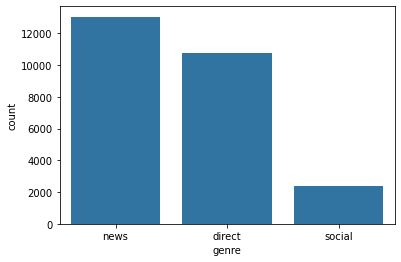

In [118]:
default = sb.color_palette()[0]

sb.countplot(data=df, x='genre', color=default, order=type_order );

- for app.py (to list)

In [60]:
genre_counts = df.groupby('genre').count()['id']
genre_names = list(genre_counts.index)

In [61]:
genre_counts

genre
direct    10766
news      13054
social     2396
Name: id, dtype: int64

In [62]:
genre_names

['direct', 'news', 'social']

#### What is the category distribution of the disastor report?

In [97]:
#df.iloc[:, 4:].sum()
category = df[df.columns[4:]].sum()
category

related                   20282
request                    4474
offer                       118
aid_related               10860
medical_help               2084
medical_products           1313
search_and_rescue           724
security                    471
military                    860
child_alone                   0
water                      1672
food                       2923
shelter                    2314
clothing                    405
money                       604
missing_people              298
refugees                    875
death                      1194
other_aid                  3446
infrastructure_related     1705
transport                  1201
buildings                  1333
electricity                 532
tools                       159
hospitals                   283
shops                       120
aid_centers                 309
other_infrastructure       1151
weather_related            7297
floods                     2155
storm                      2443
fire    

In [127]:
category_df = category_counts.reset_index(name = 'count')
category_df

,index,count
0,related,20282
1,request,4474
2,offer,118
3,aid_related,10860
4,medical_help,2084
5,medical_products,1313
6,search_and_rescue,724
7,security,471
8,military,860
9,child_alone,0


In [136]:
category_df = category_df.transpose()
category_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,,,,,,,,,,,,,,,,,,,,,
related,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
20282,20282,4474,118,10860,2084,1313,724,471,860,0,...,309,1151,7297,2155,2443,282,2455,530,1376,5075


In [139]:
category_df.columns=category_df.iloc[0]
category_df = category_df.drop(category_df.index[0])

related,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,,,,,,,,,,,,,,,,,,,,,
20282,20282,4474,118,10860,2084,1313,724,471,860,0,...,309,1151,7297,2155,2443,282,2455,530,1376,5075


- for app.py (to list)

In [100]:
category_counts = df[df.columns[4:]].sum()
category_counts

related                   20282
request                    4474
offer                       118
aid_related               10860
medical_help               2084
medical_products           1313
search_and_rescue           724
security                    471
military                    860
child_alone                   0
water                      1672
food                       2923
shelter                    2314
clothing                    405
money                       604
missing_people              298
refugees                    875
death                      1194
other_aid                  3446
infrastructure_related     1705
transport                  1201
buildings                  1333
electricity                 532
tools                       159
hospitals                   283
shops                       120
aid_centers                 309
other_infrastructure       1151
weather_related            7297
floods                     2155
storm                      2443
fire    

In [145]:
category_names = category_counts.index.tolist()
category_names

['related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'child_alone',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report']